<div style="font-size: 15px"><pre class="tab"><b>Name-</b>Haardik Gilhotra          <b>Roll no.-</b>R177219086          <b>Sap Id-</b>500076610          <b>Batch</b>-3 AI&ML</pre>
<hr>
<div style="font-size: 30px"><b><u><center>EXPERIMENT - 3</center></u></b>
    <div style="font-size: 20px"><b>Aim: Wine Quality Prediction</b>
<!--jupyter-nbconvert --to PDFviaHTML winequality.ipynb-->

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cf
import matplotlib.pyplot as plt

In [2]:
# Reading dataset
wines = pd.read_csv("winequality.csv")
wines.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [3]:
# Checking if any dataset has nan values
len(wines[wines.isna().any(axis=1)])

34

In [4]:
# Filling nan values with the mean 
for i in wines:
    if i != "type":
        wines[i].fillna(value=wines[i].mean(), inplace=True)

In [5]:
# Checking if nan values have been removed or not
len(wines[wines.isna().any(axis=1)])

0

In [6]:
# Defining the dependent and independent variables
x = wines.drop(['quality','type'],axis = 1).values
y = wines['quality'].values

In [7]:
# Splitting the dataset into training and testing data
x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.20)

Confusion Matrix: 
 [[  0   0   1   1   0   0]
 [  0   1  23  16   0   0]
 [  0   1 218 201   2   0]
 [  0   0  95 442  40   0]
 [  0   0  10 152  51   0]
 [  0   0   1  29  16   0]]
Accuracy: 54.77%


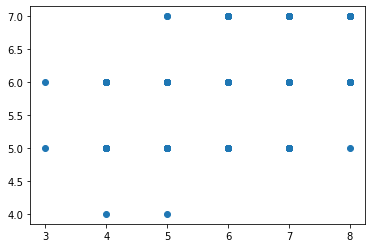

In [8]:
#--------------------------Multiple Linear Regression----------------------
# Loading the Model
model = lr()

# Fitting the model
model.fit(x_train, y_train)

# Predicting the results
y_pred = model.predict(x_test)

# Some post-processing required according to the dataset
y_pred = (np.rint(y_pred)).astype(np.uint)

# Evalutating
print("Confusion Matrix: \n",cf(y_test, y_pred))
print("Accuracy: {:.2%}".format(acc(y_test, y_pred)))

# Plotting the results
plt.scatter(y_test, y_pred)

Confusion Matrix: 
 [[  0   0   2   0   0   0]
 [  0   0   2  38   0   0]
 [  0   0  32 390   0   0]
 [  0   0  35 542   0   0]
 [  0   0   3 210   0   0]
 [  0   0   1  45   0   0]]
Accuracy: 44.15%


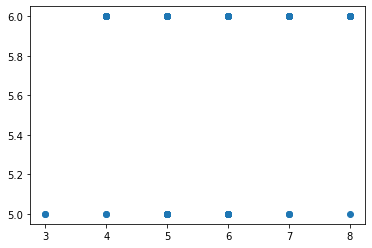

In [9]:
#--------------------------Support Vector Machine----------------------
# Loading the Model
model = SVC()

# Fitting the model
model.fit(x_train, y_train)

# Predicting the results
y_pred = model.predict(x_test)

# Some post-processing required according to the dataset
y_pred = (np.rint(y_pred)).astype(np.uint)

# Evalutating
print("Confusion Matrix: \n",cf(y_test, y_pred))
print("Accuracy: {:.2%}".format(acc(y_test, y_pred)))

# Plotting the results
plt.scatter(y_test, y_pred)

Confusion Matrix: 
 [[  0   0   1   1   0   0]
 [  0   2  27  11   0   0]
 [  0   2 242 155  21   2]
 [  0   8 190 316  62   1]
 [  1   1  42  97  70   2]
 [  0   0   7  18  15   6]]
Accuracy: 48.92%


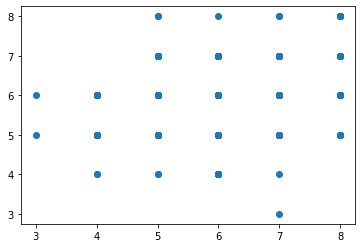

In [10]:
#--------------------------k Nearest Neighbor----------------------
# Loading the Model
model = knn(n_neighbors=5)

# Fitting the model
model.fit(x_train, y_train)

# Predicting the results
y_pred = model.predict(x_test)

# Some post-processing required according to the dataset
y_pred = (np.rint(y_pred)).astype(np.uint)

# Evalutating
print("Confusion Matrix: \n",cf(y_test, y_pred))
print("Accuracy: {:.2%}".format(acc(y_test, y_pred)))

# Plotting the results
plt.scatter(y_test, y_pred)

Confusion Matrix: 
 [[  0   0   2   0   0   0]
 [  1   8  23   8   0   0]
 [  2  18 280 101  19   2]
 [  1  16 162 297  90  11]
 [  0   3  15  78 107  10]
 [  0   1   1  14  14  16]]
Accuracy: 54.46%


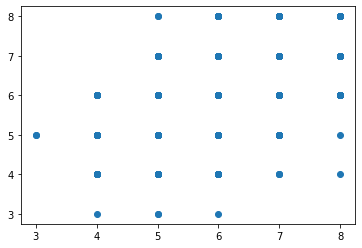

In [11]:
#--------------------------Random Forest----------------------
# Loading the Model
model = rf(n_estimators=3,max_depth=15,class_weight='balanced')

# Fitting the model
model.fit(x_train, y_train)

# Predicting the results
y_pred = model.predict(x_test)

# Some post-processing required according to the dataset
y_pred = (np.rint(y_pred)).astype(np.uint)

# Evalutating
print("Confusion Matrix: \n",cf(y_test, y_pred))
print("Accuracy: {:.2%}".format(acc(y_test, y_pred)))

# Plotting the results
plt.scatter(y_test, y_pred)